# Part 1

## Data

In [1]:
import numpy as np
import pandas as pd

# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [2]:
df = pd.read_csv('data/telecom_churn.csv')
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

## Univariate Visualization

### Quantitative features

**Histograms and Density Plots**

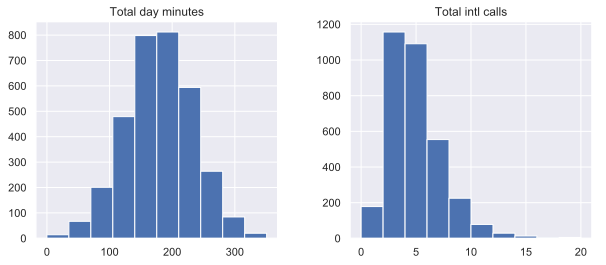

In [3]:
features = ['Total day minutes', 'Total intl calls']
df[features].hist(figsize=(10, 4));

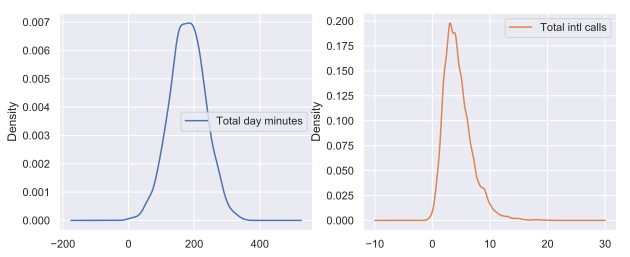

In [4]:
df[features].plot(kind='density', subplots=True, layout=(1, 2), 
                  sharex=False, figsize=(10, 4));

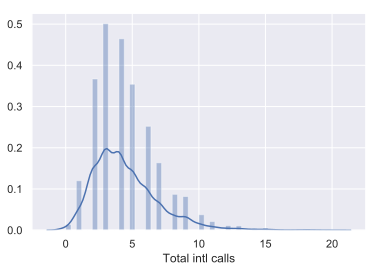

In [5]:
sns.distplot(df['Total intl calls']);

**Box Plot**

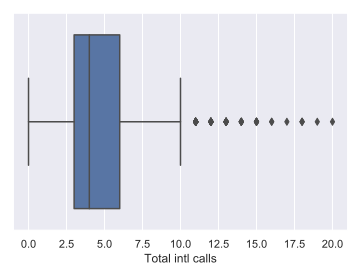

In [6]:
sns.boxplot(x='Total intl calls', data=df);

**Violin Plot**

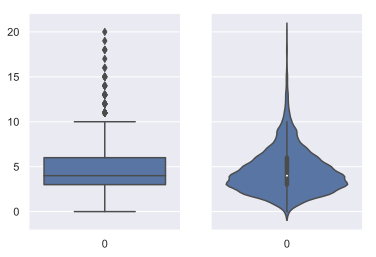

In [7]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['Total intl calls'], ax=axes[0]);
sns.violinplot(data=df['Total intl calls'], ax=axes[1]);

In [8]:
df[features].describe()

Total day minutes  Total intl calls
count        3333.000000       3333.000000
mean          179.775098          4.479448
std            54.467389          2.461214
min             0.000000          0.000000
25%           143.700000          3.000000
50%           179.400000          4.000000
75%           216.400000          6.000000
max           350.800000         20.000000

### Categorical and Binary Features

**Frequency table**

In [9]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

**Bar plot**

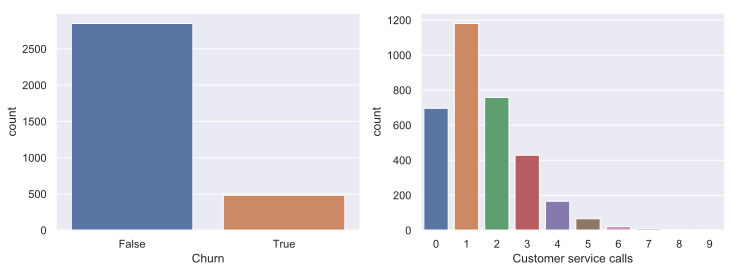

In [10]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='Churn', data=df, ax=axes[0]);
sns.countplot(x='Customer service calls', data=df, ax=axes[1]);

## Multivariate Visualization

### Quantitative vs. Quantitative

**Correlation matrix**

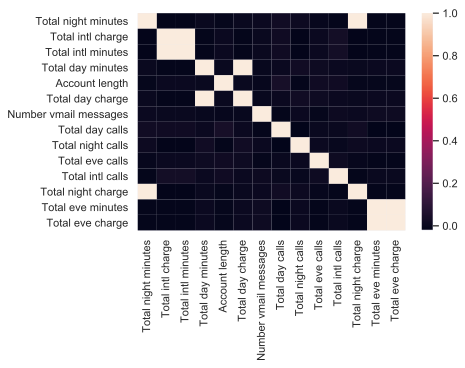

In [11]:
# Drop non-numerical variables
numerical = list(set(df.columns) - 
                 set(['State', 'International plan', 'Voice mail plan', 
                      'Area code', 'Churn', 'Customer service calls']))

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

In [12]:
numerical = list(set(numerical) - 
                 set(['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']))

**Scatter plot**

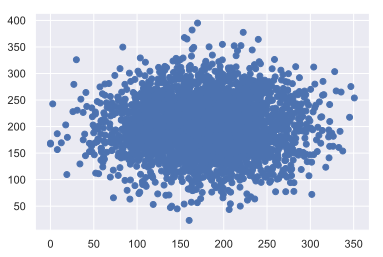

In [13]:
plt.scatter(df['Total day minutes'], df['Total night minutes']);

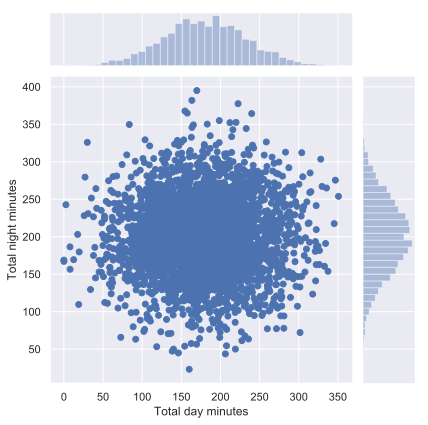

In [14]:
sns.jointplot(x='Total day minutes', y='Total night minutes', 
              data=df, kind='scatter');

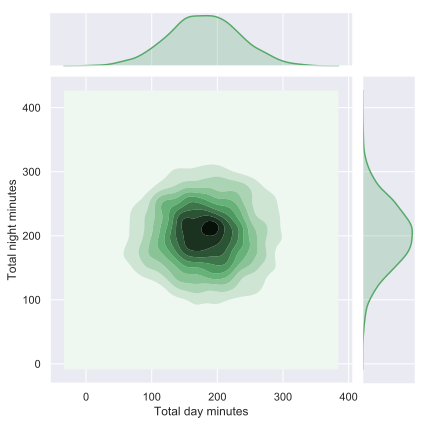

In [15]:
sns.jointplot('Total day minutes', 'Total night minutes', data=df,
              kind="kde", color="g");

**Scatterplot Matrix**

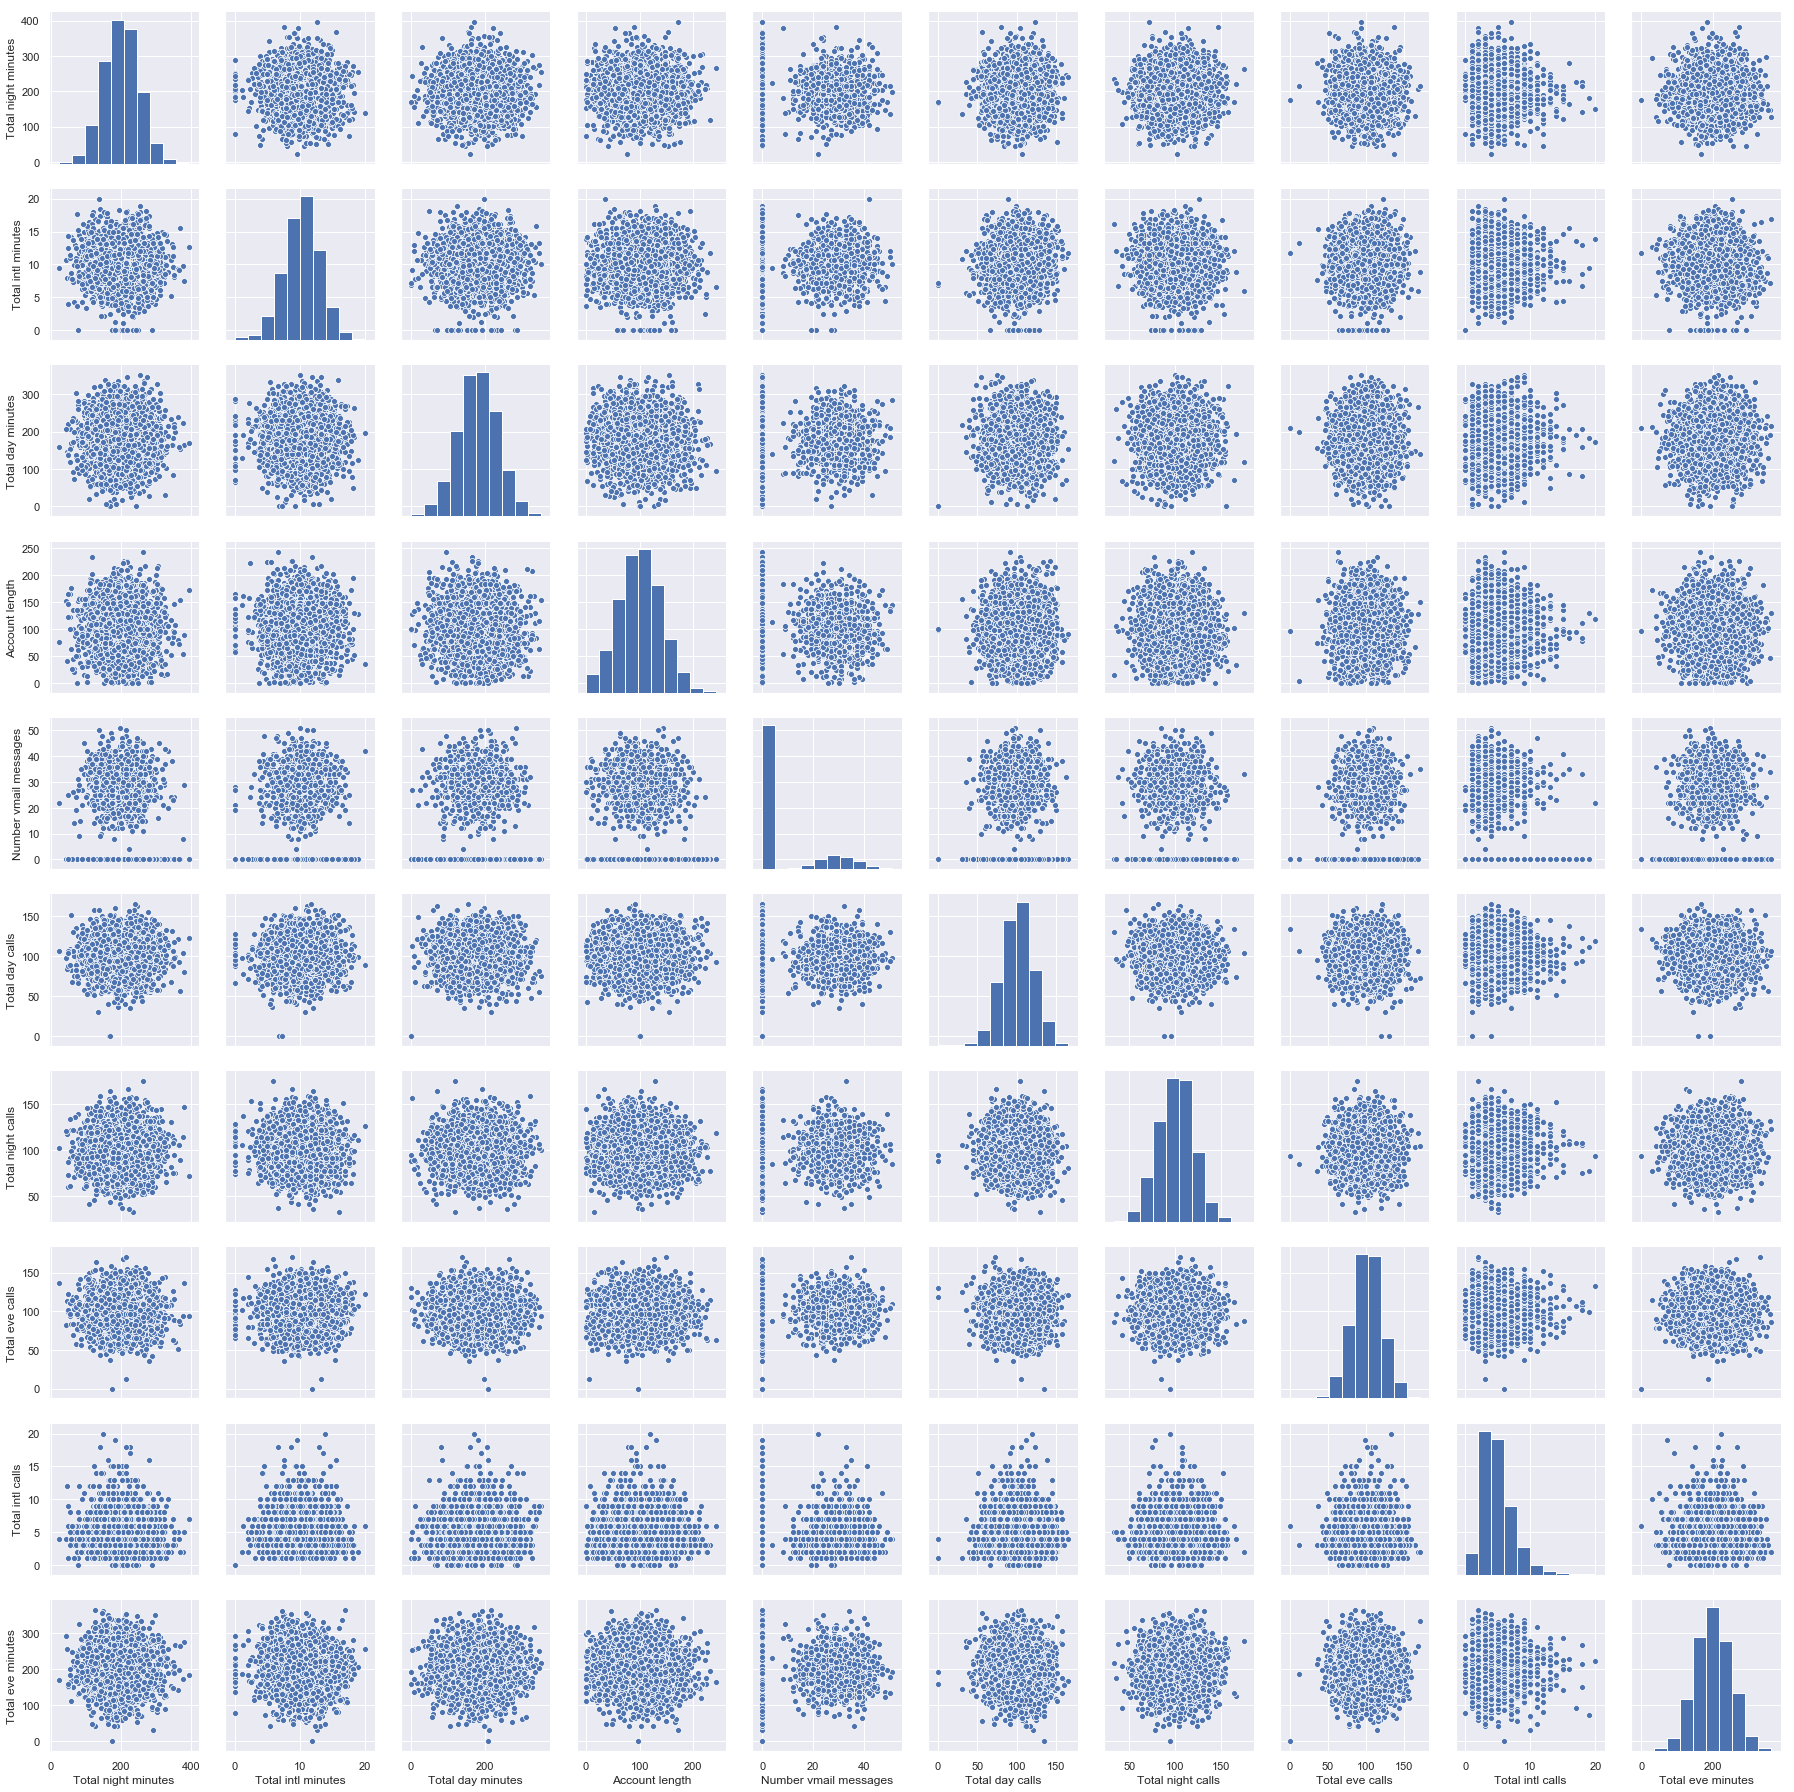

In [16]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);

In [17]:
%config InlineBackend.figure_format = 'svg'

### Quantitative vs. Categorical

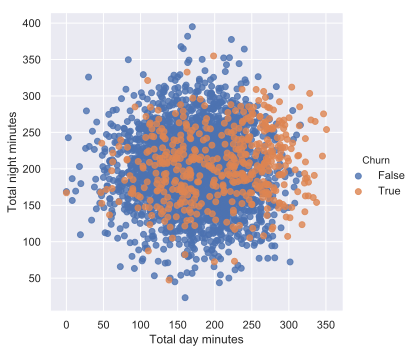

In [18]:
sns.lmplot('Total day minutes', 'Total night minutes', data=df, hue='Churn', fit_reg=False);

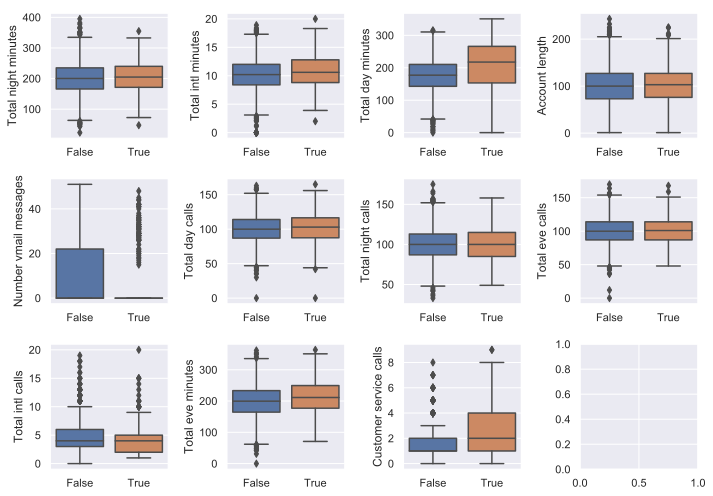

In [19]:
# Sometimes you can analyze an ordinal variable just as numerical one
numerical.append('Customer service calls')

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x='Churn', y=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();

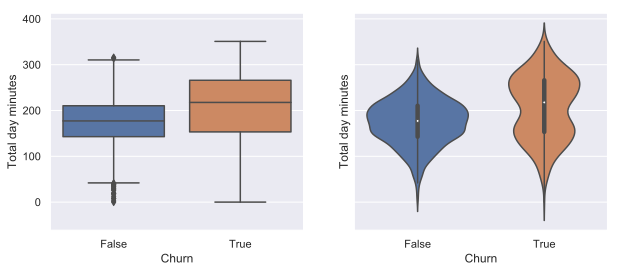

In [20]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x='Churn', y='Total day minutes', data=df, ax=axes[0]);
sns.violinplot(x='Churn', y='Total day minutes', data=df, ax=axes[1]);

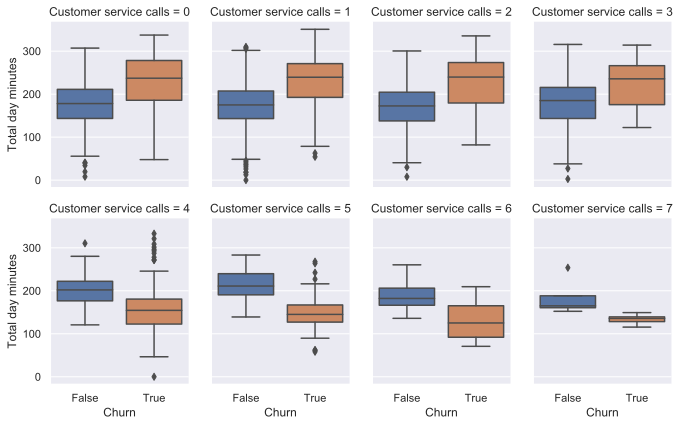

In [21]:
sns.catplot(x='Churn', y='Total day minutes', col='Customer service calls',
               data=df[df['Customer service calls'] < 8], kind="box",
               col_wrap=4, height=3, aspect=.8);

### Categorical vs. Categorical

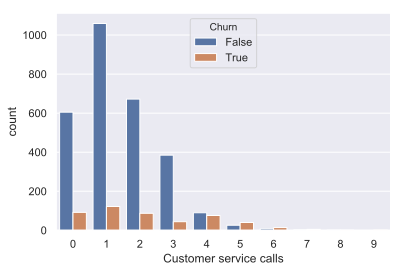

In [22]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);

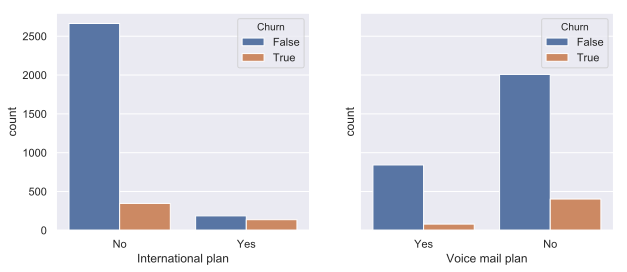

In [23]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x='International plan', hue='Churn', data=df, ax=axes[0]);
sns.countplot(x='Voice mail plan', hue='Churn', data=df, ax=axes[1]);

**Contingency Table**

In [24]:
pd.crosstab(df['State'], df['Churn']).T

State  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL ...  SD  TN  TX  UT  VA  VT  WA  \
Churn                                         ...                               
False  49  72  44  60  25  57  62  49  52  55 ...  52  48  54  62  72  65  52   
True    3   8  11   4   9   9  12   5   9   8 ...   8   5  18  10   5   8  14   

State  WI  WV  WY  
Churn              
False  71  96  68  
True    7  10   9  

[2 rows x 51 columns]

In [25]:
df.groupby(['State'])['Churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

State        NJ        CA    TX        MD        SC        MI        MS  \
mean   0.264706  0.264706  0.25  0.242857  0.233333  0.219178  0.215385   

State        NV        WA        ME    ...           RI        WI        IL  \
mean   0.212121  0.212121  0.209677    ...     0.092308  0.089744  0.086207   

State        NE        LA        IA        VA      AZ        AK        HI  
mean   0.081967  0.078431  0.068182  0.064935  0.0625  0.057692  0.056604  

[1 rows x 51 columns]

## t-SNE

In [26]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [27]:
X = df.drop(['Churn', 'State'], axis=1)
X['International plan'] = X['International plan'].map({'Yes': 1, 'No': 0})
X['Voice mail plan'] = X['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/Users/adhiman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/adhiman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [29]:
%%time
tsne = TSNE(random_state=42)
tsne_repr = tsne.fit_transform(X_scaled)

CPU times: user 34.7 s, sys: 2.26 s, total: 36.9 s
Wall time: 37 s


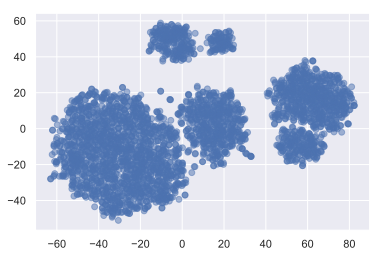

In [30]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=.5);

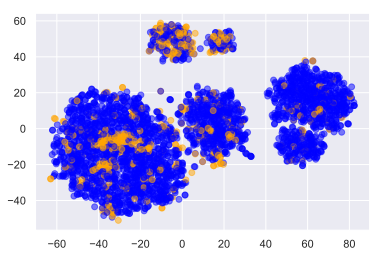

In [31]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1],
            c=df['Churn'].map({False: 'blue', True: 'orange'}), alpha=.5);

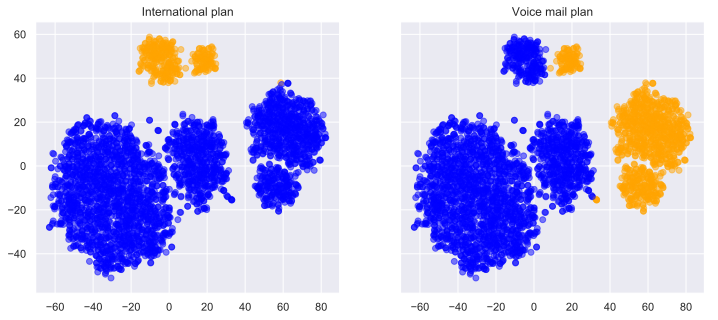

In [32]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(['International plan', 'Voice mail plan']):
    axes[i].scatter(tsne_repr[:, 0], tsne_repr[:, 1], 
                    c=df[name].map({'Yes': 'orange', 'No': 'blue'}), alpha=.5);
    axes[i].set_title(name);

# Part 2 

## Data 

In [33]:
# Disable warnings in Anaconda
import warnings
warnings.filterwarnings('ignore')

# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg' 

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['image.cmap'] = 'viridis'
import pandas as pd

In [34]:
df = pd.read_csv('data/video_games_sales.csv').dropna()
print(df.shape)

(6825, 16)


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null float64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null object
User_Count         6825 non-null float64
Developer          6825 non-null object
Rating             6825 non-null object
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [36]:
df['User_Score'] = df['User_Score'].astype('float64')
df['Year_of_Release'] = df['Year_of_Release'].astype('int64')
df['User_Count'] = df['User_Count'].astype('int64')
df['Critic_Count'] = df['Critic_Count'].astype('int64')

In [37]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]
df[useful_cols].head()

Name Platform  Year_of_Release     Genre  Global_Sales  \
0             Wii Sports      Wii             2006    Sports         82.53   
2         Mario Kart Wii      Wii             2008    Racing         35.52   
3      Wii Sports Resort      Wii             2009    Sports         32.77   
6  New Super Mario Bros.       DS             2006  Platform         29.80   
7               Wii Play      Wii             2006      Misc         28.92   

   Critic_Score  Critic_Count  User_Score  User_Count Rating  
0          76.0            51         8.0         322      E  
2          82.0            73         8.3         709      E  
3          80.0            73         8.0         192      E  
6          89.0            65         8.5         431      E  
7          58.0            41         6.6         129      E

## Plotting

### Pandas

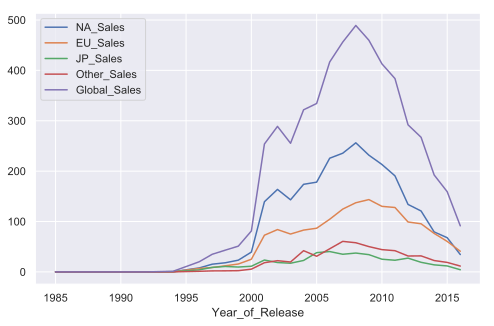

In [38]:
df[[x for x in df.columns if 'Sales' in x] + 
   ['Year_of_Release']].groupby('Year_of_Release').sum().plot();

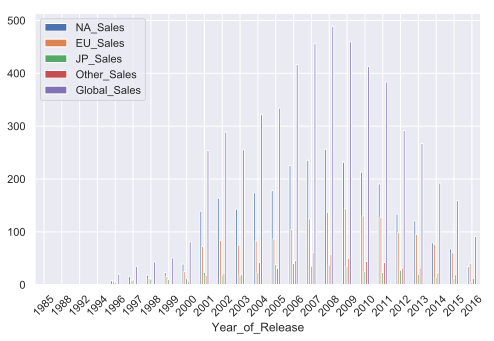

In [39]:
df[[x for x in df.columns if 'Sales' in x] + 
   ['Year_of_Release']].groupby('Year_of_Release').sum().plot(kind='bar', rot=45);

### Seaborn
**`pairplot()`**

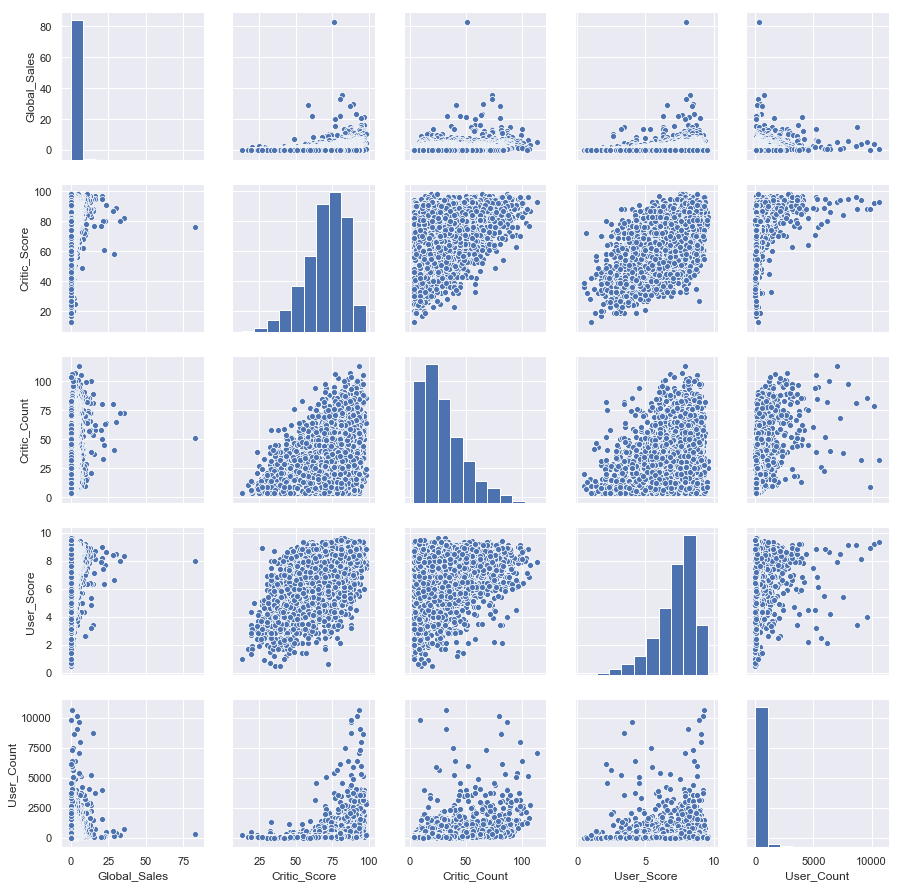

In [40]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png' 
sns.pairplot(df[['Global_Sales', 'Critic_Score', 'Critic_Count', 
                 'User_Score', 'User_Count']]);

**`distplot()`**

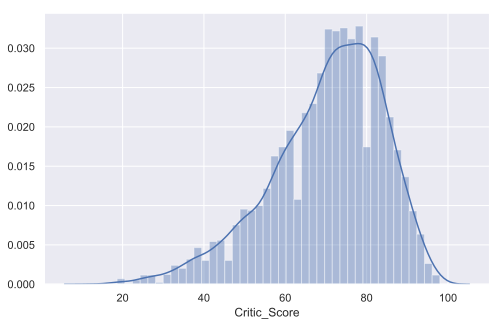

In [41]:
%config InlineBackend.figure_format = 'svg'
sns.distplot(df['Critic_Score']);

**`jointplot()`**

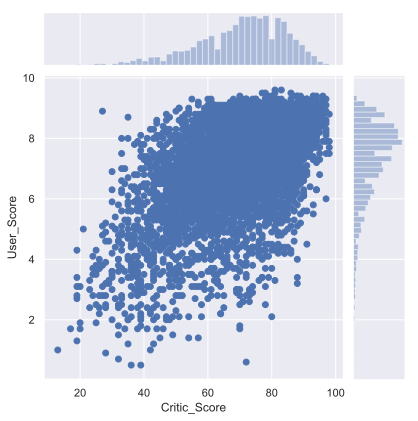

In [42]:
sns.jointplot(x='Critic_Score', y='User_Score', 
              data=df, kind='scatter');

**`boxplot()`**

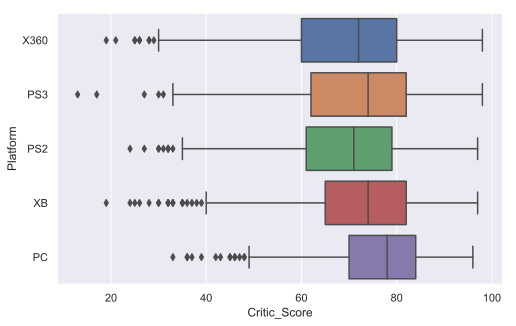

In [43]:
top_platforms = df['Platform'].value_counts().sort_values(ascending=False).head(5).index.values
sns.boxplot(y="Platform", x="Critic_Score", 
            data=df[df['Platform'].isin(top_platforms)], orient="h");

**`heatmap()`**

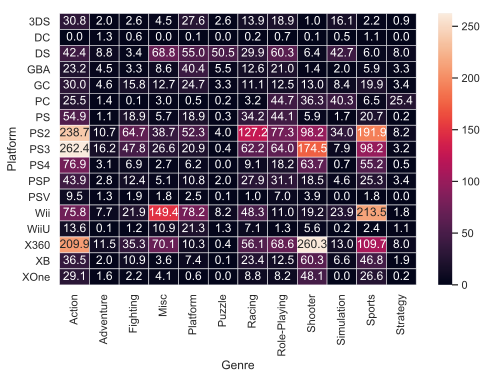

In [44]:
platform_genre_sales = df.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5);

### Plotly

In [45]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

**Lineplot**

In [46]:
years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum().join(
    df.groupby('Year_of_Release')[['Name']].count())
years_df.columns = ['Global_Sales', 'Number_of_Games']

In [47]:
# Create a line (trace) for the global sales
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df['Global_Sales'],
    name='Global Sales'
)

# Create a line (trace) for the number of games released
trace1 = go.Scatter(
    x=years_df.index,
    y=years_df['Number_of_Games'],
    name='Number of games released'
)

# Define the data array
data = [trace0, trace1]

# Set the title
layout = {'title': 'Statistics for video games'}

# Create a Figure and plot it
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [48]:
plotly.offline.plot(fig, filename='years_stats.html', show_link=False);

**Bar chart**

In [49]:
# Do calculations and prepare the dataset
platforms_df = df.groupby('Platform')[['Global_Sales']].sum().join(
    df.groupby('Platform')[['Name']].count()
)
platforms_df.columns = ['Global_Sales', 'Number_of_Games']
platforms_df.sort_values('Global_Sales', ascending=False, inplace=True)

In [50]:
# Create a bar for the global sales
trace0 = go.Bar(
    x=platforms_df.index,
    y=platforms_df['Global_Sales'],
    name='Global Sales'
)

# Create a bar for the number of games released
trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df['Number_of_Games'],
    name='Number of games released'
)

# Get together the data and style objects
data = [trace0, trace1]
layout = {'title': 'Market share by gaming platform'}

# Create a `Figure` and plot it
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

**Boxplot**

In [51]:
data = []

# Create a box trace for each genre in our dataset
for genre in df.Genre.unique():
    data.append(
        go.Box(y=df[df.Genre == genre].Critic_Score, name=genre)
    )
    
# Visualize
iplot(data, show_link=False)